In [1522]:
import pandas as pd
import numpy as np
import datetime as dt
from math import floor
import math

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

In [1523]:
df=pd.read_csv("Camp_Market.csv", sep=";")

In [1524]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [1525]:
df.shape

(2240, 29)

In [1526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1527]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], utc=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [1528]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [1529]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [1530]:
#Vérifier si des valeurs sont nulles

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

<Axes: >

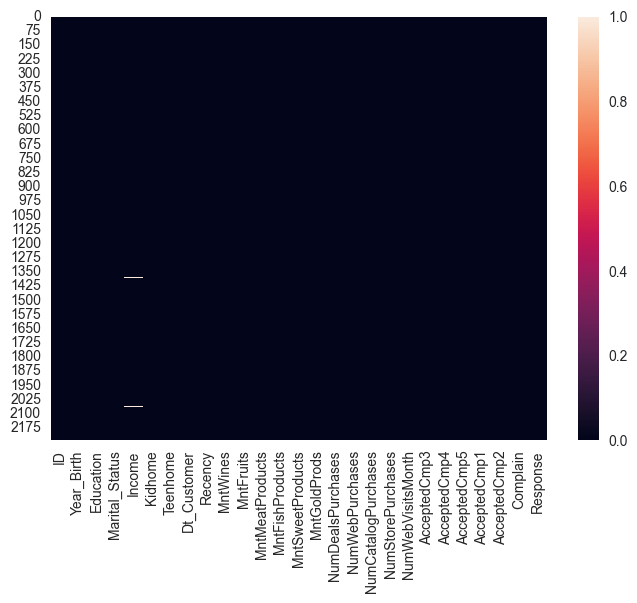

In [1531]:
#Vérifier quelles donénes sont manquantes

sns.heatmap(df.isnull())

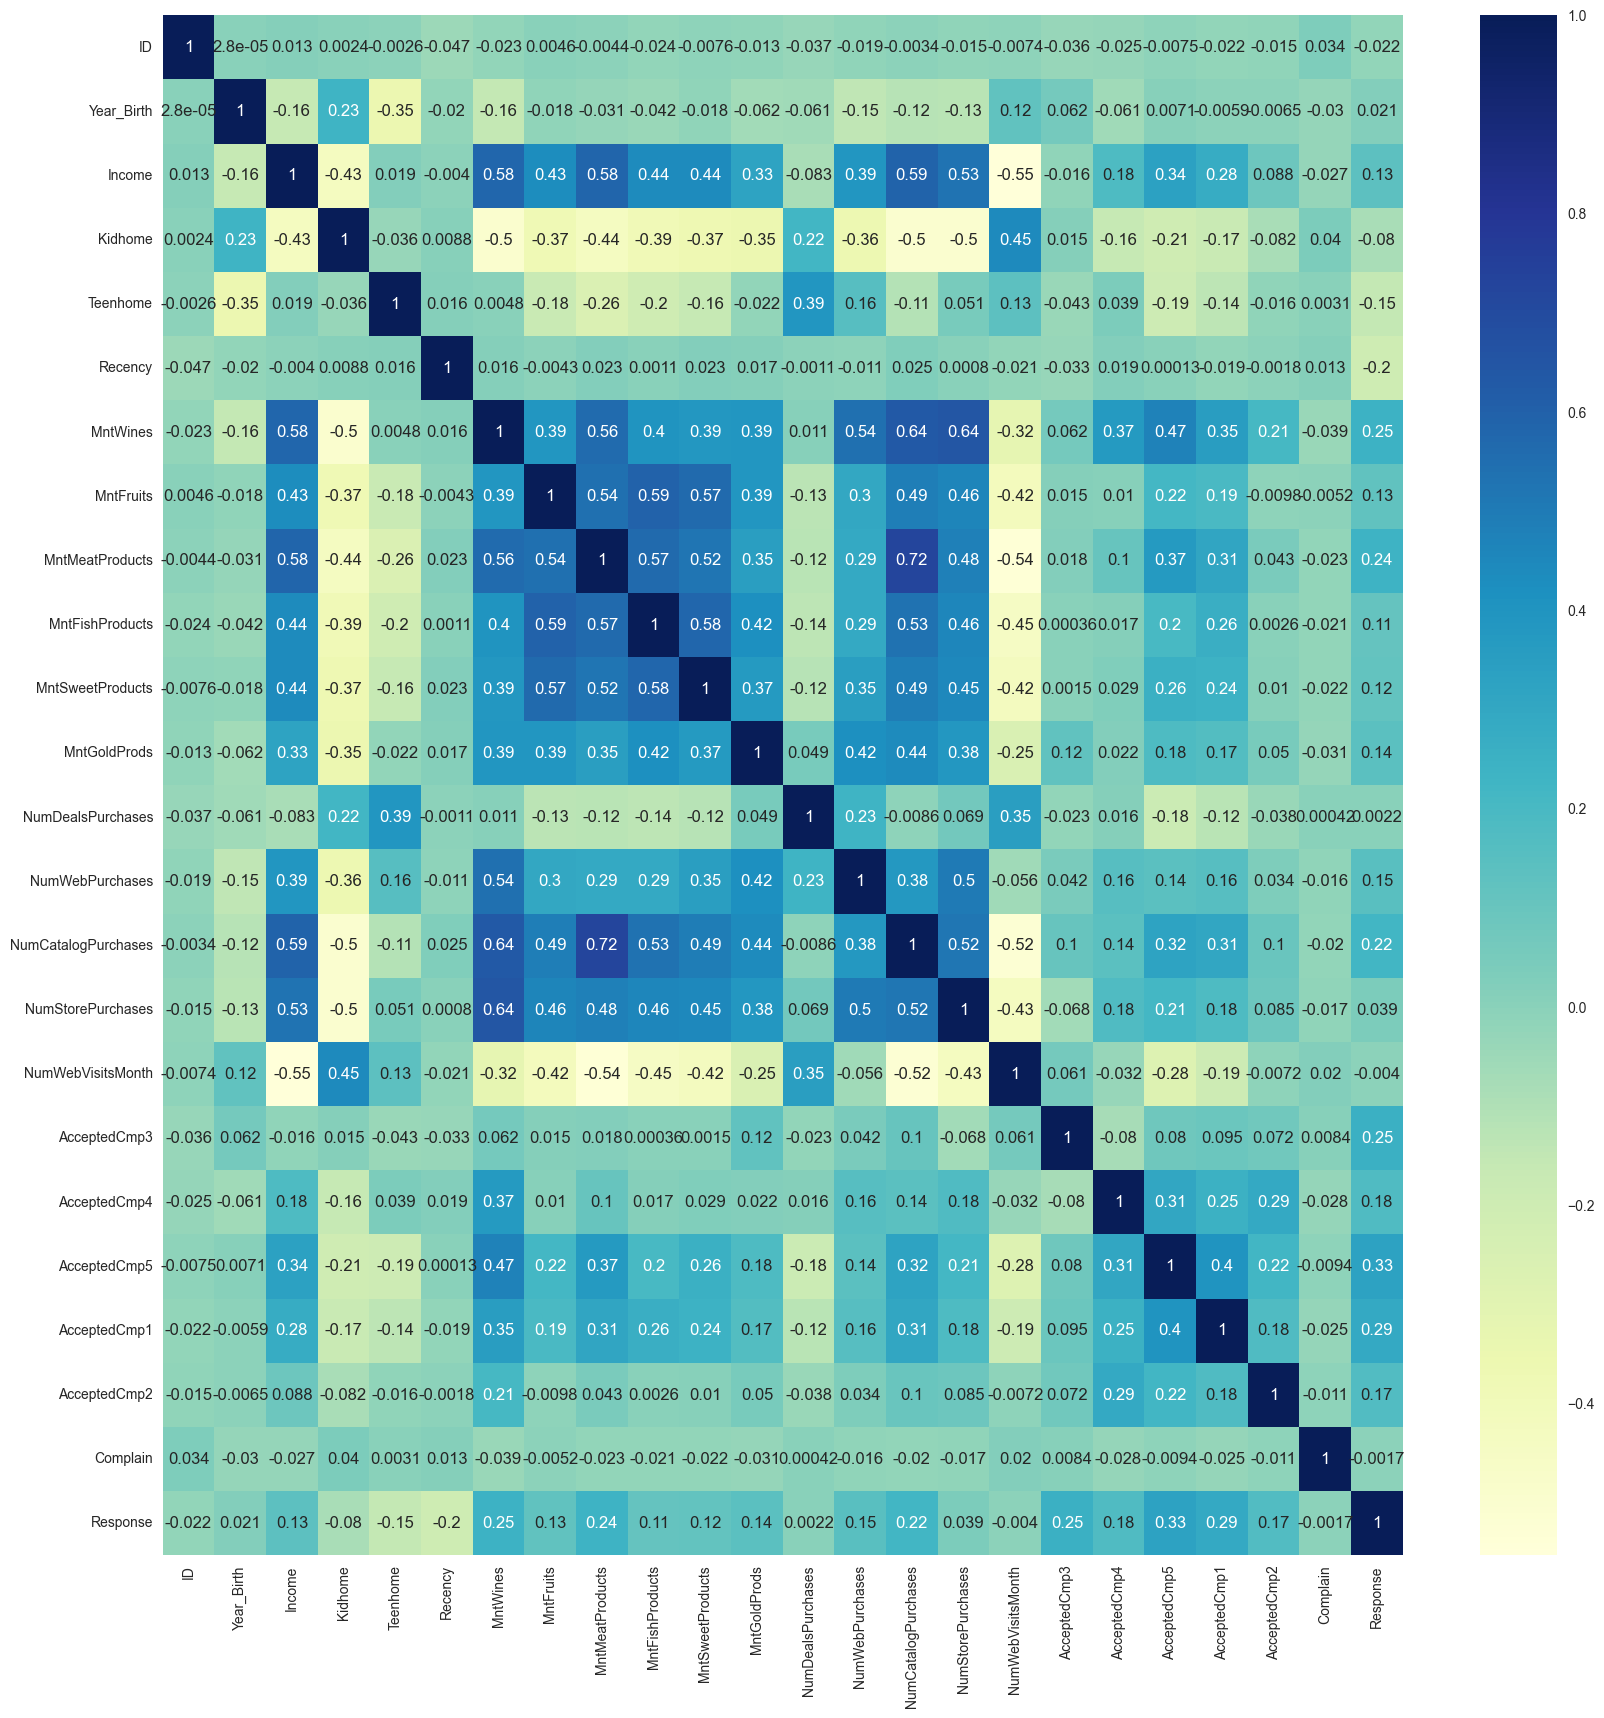

In [1532]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20,20))
sns.heatmap(df_numeric.corr(), annot=True, cmap="YlGnBu",)
plt.show()

In [1533]:
corr = df_numeric.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

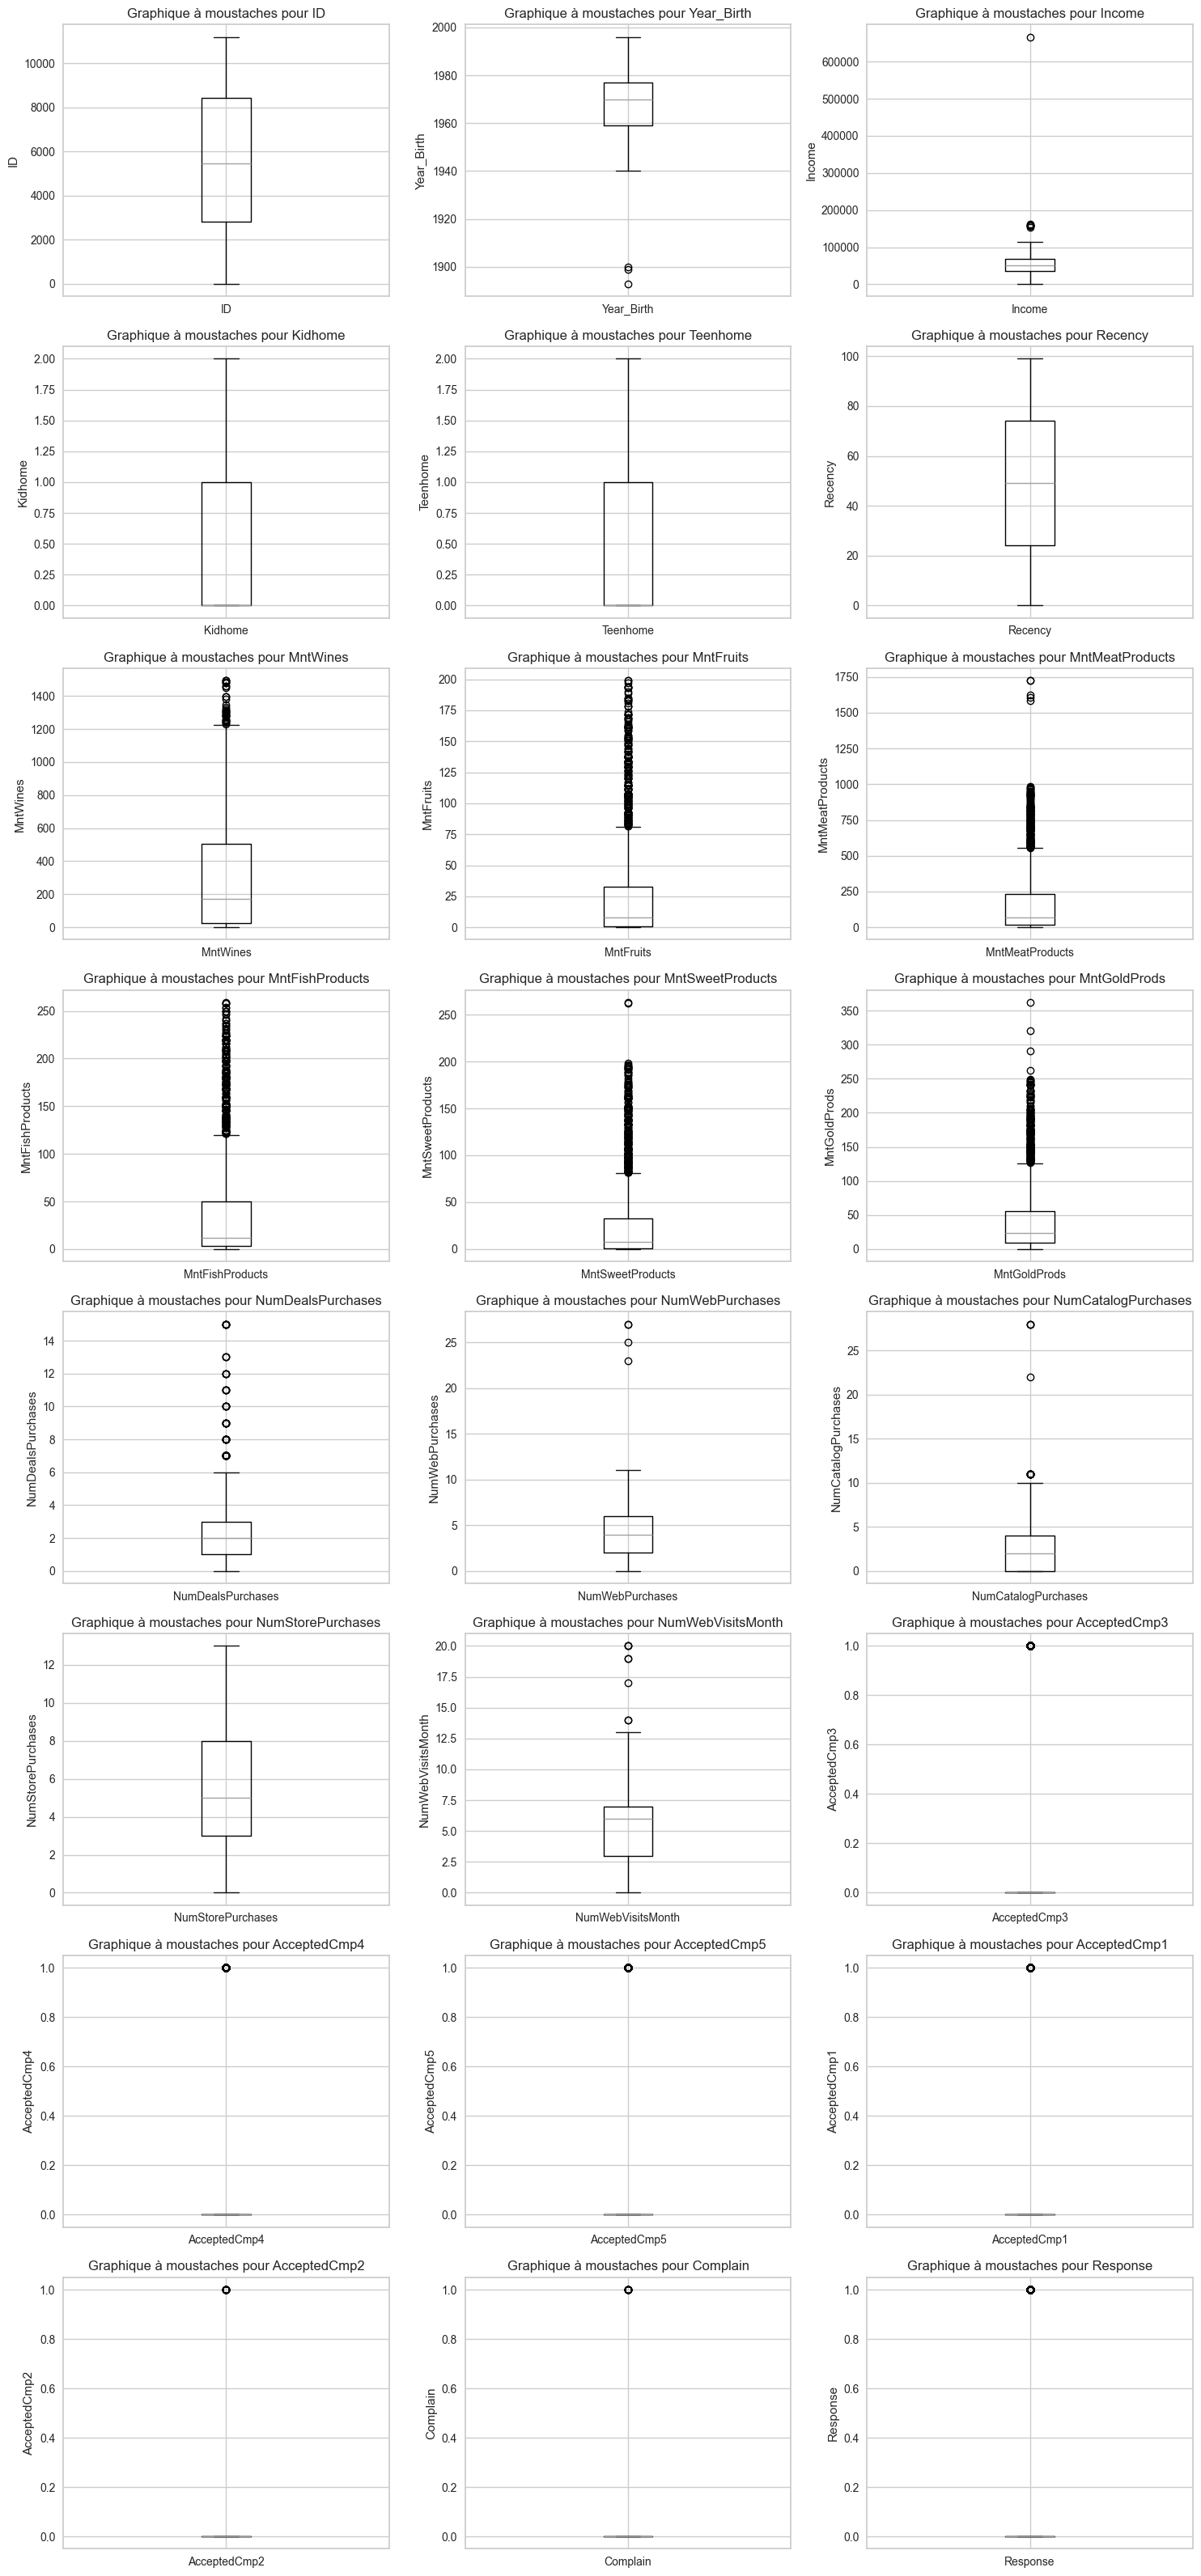

In [1534]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
cols_per_row = 3
num_cols = len(numeric_cols.columns)
num_rows = math.ceil(num_cols / cols_per_row)
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))
axes = axes.flatten()
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
for i, col in enumerate(numeric_cols.columns):
    numeric_cols.boxplot(column=[col], ax=axes[i])
    axes[i].set_title(f'Graphique à moustaches pour {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

<Axes: >

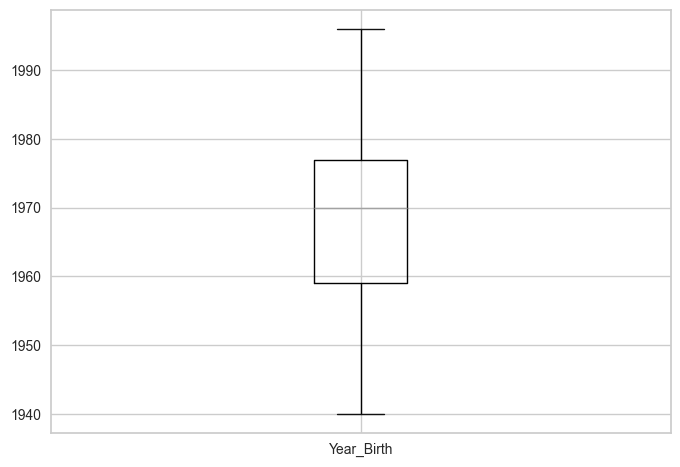

In [1535]:
df = df[df['Year_Birth'] > 1900]
df = df[df['Income'] < 200000]
data=df
plt.figure()
df.boxplot(column=["Year_Birth"])

In [1536]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df = df.drop(columns=['Year_Birth'])
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43


In [1537]:
fig = px.histogram(df, x='Age', nbins=20, title='Distribution des âges des clients',
                   labels={'Age': 'Âge'}, 
                   color_discrete_sequence=['skyblue'])
fig.show()

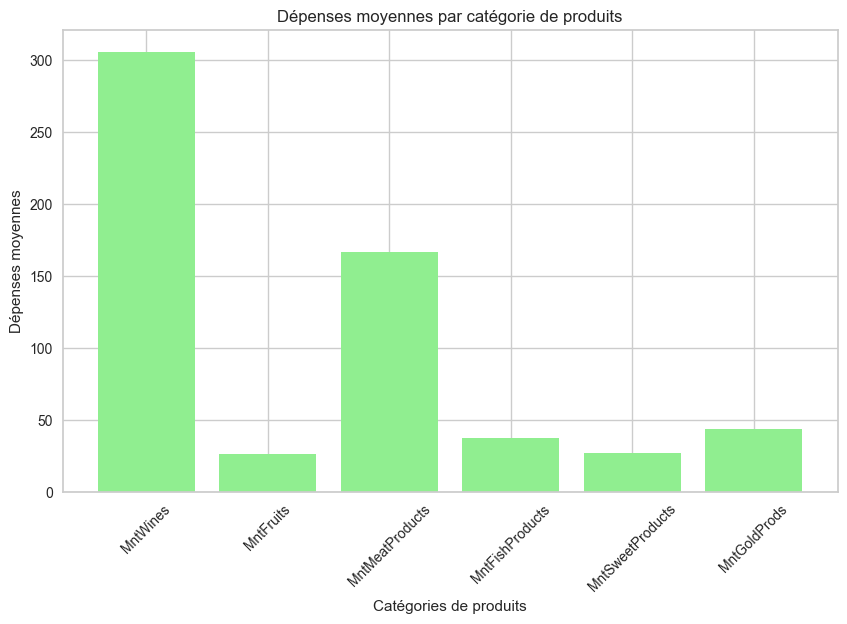

In [1538]:
# Dépenses moyennes dans chaque catégorie de produits
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
moyennes = df[categories].mean()

# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(categories, moyennes, color='lightgreen')
plt.title('Dépenses moyennes par catégorie de produits')
plt.xlabel('Catégories de produits')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=45)
plt.show()

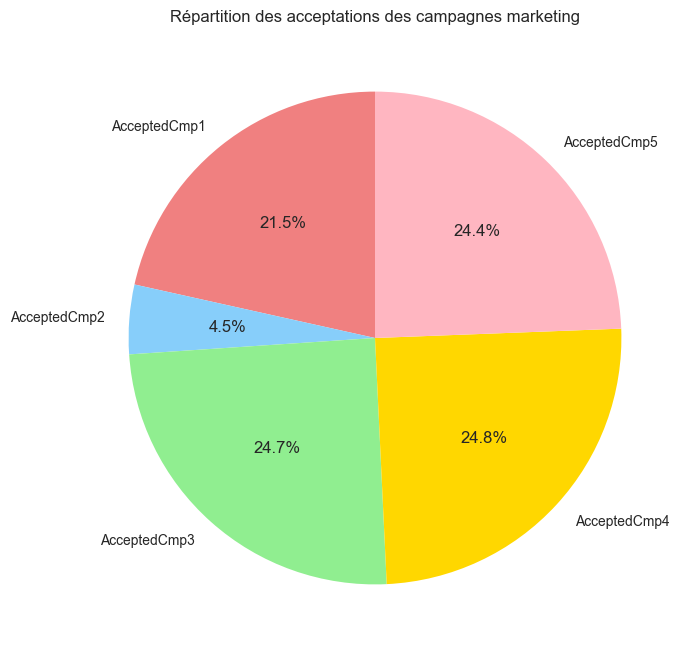

In [1539]:
# Somme des clients ayant accepté chaque campagne
campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptations = df[campagnes].sum()

# Créer un graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(acceptations, labels=campagnes, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Répartition des acceptations des campagnes marketing')
plt.show()

                MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Has_Children                                                            
Avec enfants  232.342405  16.009494        85.616456        22.077848   
Sans enfants  487.650316  52.129747       370.563291        76.575949   

              MntSweetProducts  MntGoldProds  
Has_Children                                  
Avec enfants         16.600000     35.903165  
Sans enfants         53.162975     63.982595  


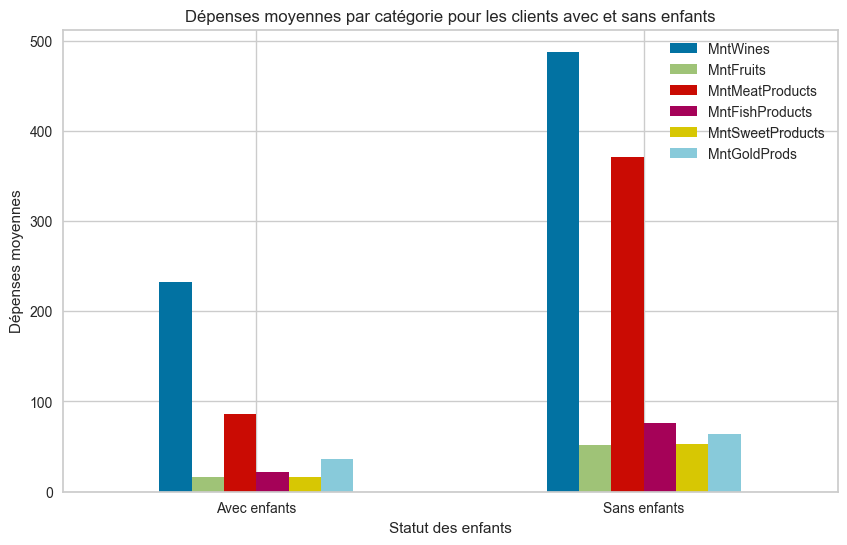

In [1540]:
# Créer une nouvelle colonne pour indiquer si le client a des enfants
df_Kids=df
df_Kids['Has_Children'] = df_Kids['Kidhome'] + df['Teenhome']
df_Kids['Has_Children'] = df_Kids['Has_Children'].apply(lambda x: 'Avec enfants' if x > 0 else 'Sans enfants')

# Comparer les dépenses moyennes pour ceux avec et sans enfants
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

depenses_moyennes = df_Kids.groupby('Has_Children')[categories].mean()

# Afficher les résultats
print(depenses_moyennes)

# Visualiser les résultats avec un diagramme en barres
depenses_moyennes.plot(kind='bar', figsize=(10, 6))
plt.title('Dépenses moyennes par catégorie pour les clients avec et sans enfants')
plt.xlabel('Statut des enfants')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

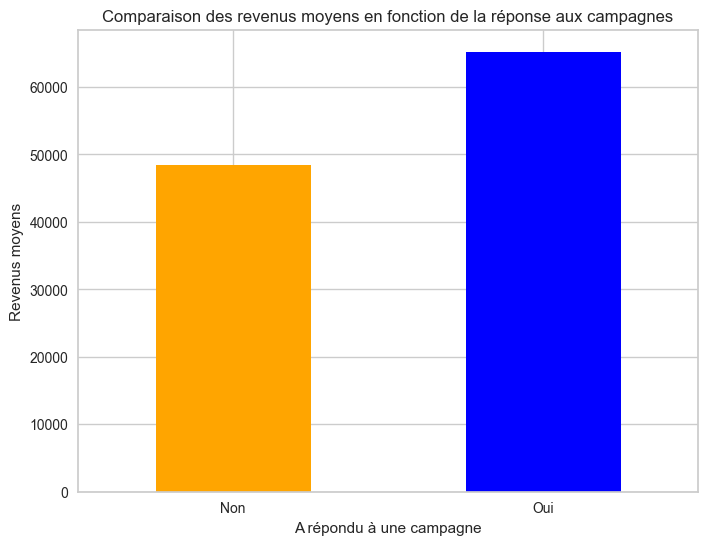

In [1541]:
df_resp=df
df_resp['Has_Responded'] = df_resp[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

# Comparer les revenus moyens entre ceux qui ont répondu et ceux qui n'ont pas répondu
revenus_moyens = df_resp.groupby('Has_Responded')['Income'].mean()

# Visualiser avec un diagramme en barres
plt.figure(figsize=(8, 6))
revenus_moyens.plot(kind='bar', color=['orange', 'blue'])
plt.title('Comparaison des revenus moyens en fonction de la réponse aux campagnes')
plt.xlabel('A répondu à une campagne')
plt.ylabel('Revenus moyens')
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)
plt.show()

In [1542]:
df = df.set_index('ID')

In [1543]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Education'].value_counts()

Education
Graduation    1115
Master         563
PhD            480
Basic           54
Name: count, dtype: int64

In [1544]:
mar_stat = ['Single', 'Widow', 'Alone', 'Absurd', 'YOLO']
df['Marital_Status'] = np.where(df['Marital_Status'].isin(mar_stat), 'Single', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'].isin(['Married', 'Together']), 'Relationship', 'Single')
df['Marital_Status'].value_counts()

Marital_Status
Relationship    1428
Single           784
Name: count, dtype: int64

In [1545]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids'].value_counts()

Kids
1    1114
0     632
2     416
3      50
Name: count, dtype: int64

In [1546]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], utc=False)
last_enrollment = pd.to_datetime(df['Dt_Customer'].max(), utc=False)
df['Days_Enrolled'] = (last_enrollment-df['Dt_Customer']).dt.days

In [1547]:
df.drop(columns = ['Kidhome', 'Teenhome', 'Dt_Customer'], inplace=True)

In [1548]:
df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

fig = px.scatter(df, x='Income', y='Total_Spend', title='Relation entre les revenus et les dépenses totales des clients',
                 labels={'Income': 'Revenus', 'Total_Spend': 'Dépenses totales'},
                 hover_data=['Education', 'Marital_Status'],
                 color='Education')  # Ajouter la couleur par le niveau d'éducation

# Afficher le graphique
fig.show()

In [1549]:
df['CouponsAccepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebVisitsMonth'], inplace=True)

In [1550]:
df.rename(columns={'NumStorePurchases':'Store_Purchases'}, inplace=True)
df['Non_Store_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']

In [1551]:
df['Total_Purchases'] = df['Store_Purchases']+df['Non_Store_Purchases']
df['Store_Purchases_Pct'] = df['Store_Purchases']/df['Total_Purchases']
df['Non_Store_Purchases_Pct'] = 1-df['Store_Purchases_Pct']
df['Customer_Type'] = np.where(df['Store_Purchases_Pct'] >= 0.5, "Offline", "Online")

In [1552]:
df.head()


,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,Store_Purchases,Complain,Age,Has_Children,Has_Responded,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Non_Store_Purchases,Total_Purchases,Store_Purchases_Pct,Non_Store_Purchases_Pct,Customer_Type
ID,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,58,3,8,10,4,0,67,Sans enfants,False,0,663,1617,1,18,22,0.181818,0.818182,Online
2174,Graduation,Single,46344.0,38,2,1,1,2,0,70,Avec enfants,False,2,113,27,0,2,4,0.500000,0.500000,Offline
4141,Graduation,Relationship,71613.0,26,1,8,2,10,0,59,Sans enfants,False,0,312,776,0,10,20,0.500000,0.500000,Offline
6182,Graduation,Relationship,26646.0,26,2,2,0,4,0,40,Avec enfants,False,1,139,53,0,2,6,0.666667,0.333333,Offline
5324,PhD,Relationship,58293.0,94,5,5,3,6,0,43,Avec enfants,False,1,161,422,0,8,14,0.428571,0.571429,Online


In [1553]:
df.drop(columns=['Store_Purchases_Pct', 'Non_Store_Purchases_Pct', 'Non_Store_Purchases', 'NumWebPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Store_Purchases'], inplace=True)

In [1554]:
df['Age'] = np.where(df['Age'] <= 30, "(0,30]", np.where(df['Age'] <= 40, "(30,40]", np.where(df['Age'] <= 50, "(40,50]", np.where(df['Age'] <= 60, "(50, 60]", np.where(df['Age'] <=70, "(60, 70]", (70, ))))))

In [1555]:
df['Recency_'] = df['Recency']/14
df['Recency_'] = df['Recency_'].apply(lambda x : str(x))
df.drop(columns = ['Recency'], inplace=True)


In [1556]:
df.drop(columns=['Customer_Type', 'Complain'], inplace=True)

In [1557]:
df_ = df.copy()
df_.reset_index(inplace=True)

In [1558]:
df.to_csv("Prepared_Data.csv")

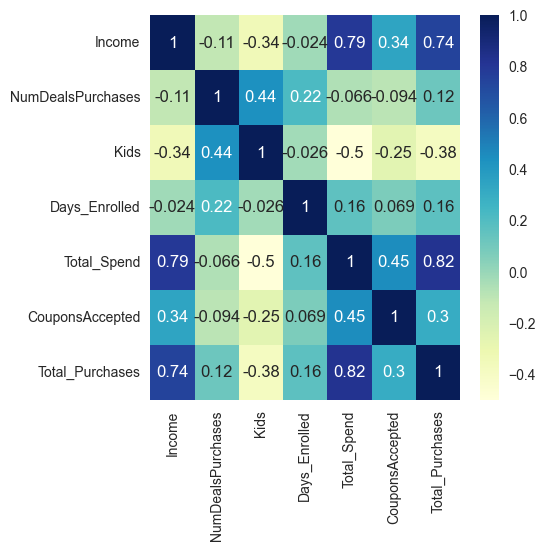

In [1559]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(5,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="YlGnBu",)
plt.show()

In [1560]:
rfm_data = pd.DataFrame()

# Récence (Recency) : déjà présente dans les données
rfm_data['Recency'] = data['Recency']

# Fréquence (Frequency) : somme des différents types d'achats
rfm_data['Frequency'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Montant (Monetary) : somme des montants dépensés dans les différentes catégories de produits
rfm_data['Monetary'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Normalisation des données RFM pour le clustering
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

# Application du clustering K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Création du graphique interactif en 3D avec Plotly
fig = px.scatter_3d(
    rfm_data, 
    x='Recency', 
    y='Frequency', 
    z='Monetary', 
    color='Cluster',
    title='Segmentation des clients en 3D (RFM)',
    labels={'Recency': 'Récence', 'Frequency': 'Fréquence', 'Monetary': 'Montant dépensé'},
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_traces(marker=dict(size=4))  # Vous pouvez ajuster cette valeur pour changer la taille des points

# Affichage du graphique interactif
fig.show()

# Affichage des premiers résultats de la segmentation RFM avec les clusters
rfm_data.head()

,Recency,Frequency,Monetary,Cluster
0,58,22,1617,2
1,38,4,27,1
2,26,20,776,0
3,26,6,53,1
4,94,14,422,3


In [1561]:
df = pd.read_csv('Prepared_Data.csv', sep=",", index_col=0)
df_copy = df.copy()
df_ = df.copy()
df_.reset_index(inplace=True)
df_.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Has_Children,Has_Responded,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,5524,Graduation,Single,58138.0,3,"(60, 70]",Sans enfants,False,0,663,1617,1,22,4.142857
1,2174,Graduation,Single,46344.0,2,"(60, 70]",Avec enfants,False,2,113,27,0,4,2.714286
2,4141,Graduation,Relationship,71613.0,1,"(50, 60]",Sans enfants,False,0,312,776,0,20,1.857143
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",Avec enfants,False,1,139,53,0,6,1.857143
4,5324,PhD,Relationship,58293.0,5,"(40,50]",Avec enfants,False,1,161,422,0,14,6.714286


In [1562]:
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Income', 'NumDealsPurchases', 'Kids', 'Days_Enrolled', 'Total_Spend', 'CouponsAccepted', 'Total_Purchases', 'Recency_']


In [1563]:
autoscaler = StandardScaler()
df[int_list] = autoscaler.fit_transform(df[int_list])
df.dtypes

Education             object
Marital_Status        object
Income               float64
NumDealsPurchases    float64
Age                   object
Has_Children          object
Has_Responded           bool
Kids                 float64
Days_Enrolled        float64
Total_Spend          float64
CouponsAccepted      float64
Total_Purchases      float64
Recency_             float64
dtype: object

In [1564]:
df.reset_index('ID', inplace=True)
df.reset_index(inplace=True)
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Has_Children,Has_Responded,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,0,5524,Graduation,Single,0.287105,0.351030,"(60, 70]",Sans enfants,False,-1.264598,1.527721,1.676245,0.617244,1.309461,0.310353
1,1,2174,Graduation,Single,-0.260882,-0.168701,"(60, 70]",Avec enfants,False,1.404572,-1.189011,-0.963297,-0.502808,-1.189221,-0.380813
2,2,4141,Graduation,Relationship,0.913196,-0.688432,"(50, 60]",Sans enfants,False,-1.264598,-0.206048,0.280110,-0.502808,1.031830,-0.795514
3,3,6182,Graduation,Relationship,-1.176114,-0.168701,"(30,40]",Avec enfants,False,0.069987,-1.060584,-0.920135,-0.502808,-0.911590,-0.795514
4,4,5324,PhD,Relationship,0.294307,1.390492,"(40,50]",Avec enfants,False,0.069987,-0.951915,-0.307562,-0.502808,0.198936,1.554453


In [1565]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Age', 'Has_Children']

In [1566]:
onehotencoder = OneHotEncoder() 
data = pd.DataFrame(onehotencoder.fit_transform(df[['Age', 'Recency_']]).toarray())
data = data.reset_index()
df = pd.merge(left = df, right = data, on = 'index')
df = df.drop(columns = ['Age'])

In [1567]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Has_Children']

In [1568]:
label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Has_Children,Has_Responded,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
0,0,5524,1,1,0.287105,0.351030,1,False,-1.264598,1.527721,1.676245,0.617244,1.309461,0.310353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2174,1,1,-0.260882,-0.168701,0,False,1.404572,-1.189011,-0.963297,-0.502808,-1.189221,-0.380813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4141,1,0,0.913196,-0.688432,1,False,-1.264598,-0.206048,0.280110,-0.502808,1.031830,-0.795514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6182,1,0,-1.176114,-0.168701,0,False,0.069987,-1.060584,-0.920135,-0.502808,-0.911590,-0.795514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5324,3,0,0.294307,1.390492,0,False,0.069987,-0.951915,-0.307562,-0.502808,0.198936,1.554453,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1569]:
df.drop(columns=[df.columns[0]], inplace=True)
df.set_index('ID', inplace=True)

df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Has_Children,Has_Responded,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1,1,0.287105,0.351030,1,False,-1.264598,1.527721,1.676245,0.617244,1.309461,0.310353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2174,1,1,-0.260882,-0.168701,0,False,1.404572,-1.189011,-0.963297,-0.502808,-1.189221,-0.380813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4141,1,0,0.913196,-0.688432,1,False,-1.264598,-0.206048,0.280110,-0.502808,1.031830,-0.795514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6182,1,0,-1.176114,-0.168701,0,False,0.069987,-1.060584,-0.920135,-0.502808,-0.911590,-0.795514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5324,3,0,0.294307,1.390492,0,False,0.069987,-0.951915,-0.307562,-0.502808,0.198936,1.554453,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


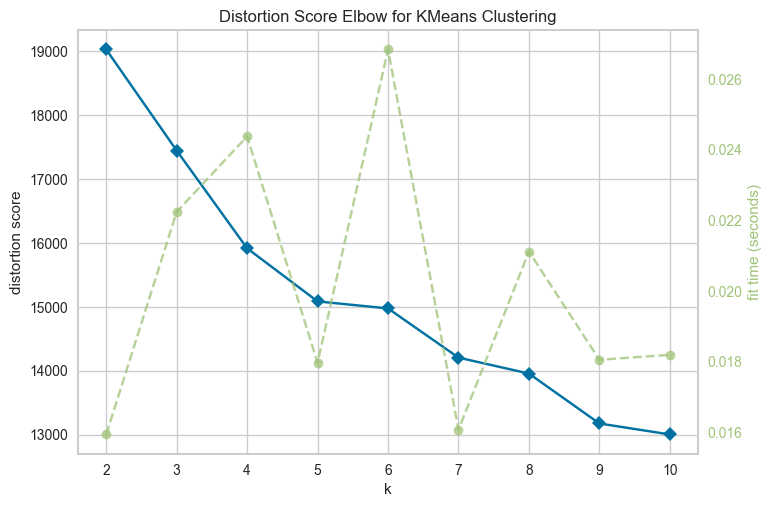

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1570]:
df.columns = df.columns.astype(str)
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = 10, random_state = 42)

visualizer.fit(df)
visualizer.show()

In [1571]:
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df)
pred = kmeans.predict(df)
df['Cluster'] = pred+1
df = df.reset_index('ID')

df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Has_Children,Has_Responded,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,Cluster
0,5524,1,1,0.287105,0.351030,1,False,-1.264598,1.527721,1.676245,0.617244,1.309461,0.310353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2174,1,1,-0.260882,-0.168701,0,False,1.404572,-1.189011,-0.963297,-0.502808,-1.189221,-0.380813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,4141,1,0,0.913196,-0.688432,1,False,-1.264598,-0.206048,0.280110,-0.502808,1.031830,-0.795514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,6182,1,0,-1.176114,-0.168701,0,False,0.069987,-1.060584,-0.920135,-0.502808,-0.911590,-0.795514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,5324,3,0,0.294307,1.390492,0,False,0.069987,-0.951915,-0.307562,-0.502808,0.198936,1.554453,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4


In [1572]:
df_ = pd.merge(df_, df[['ID', 'Cluster']], how='left')


df_['Cluster'] = df_['Cluster'].astype('str')
df_['Cluster'] = np.where(df_['Cluster'] == '1', "Cluster 1", np.where(df_['Cluster'] == '2', "Cluster 2", np.where(df_['Cluster'] == '3', "Cluster 3", "Cluster 4")))

df_.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Has_Children,Has_Responded,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,Cluster
0,5524,Graduation,Single,58138.0,3,"(60, 70]",Sans enfants,False,0,663,1617,1,22,4.142857,Cluster 3
1,2174,Graduation,Single,46344.0,2,"(60, 70]",Avec enfants,False,2,113,27,0,4,2.714286,Cluster 2
2,4141,Graduation,Relationship,71613.0,1,"(50, 60]",Sans enfants,False,0,312,776,0,20,1.857143,Cluster 3
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",Avec enfants,False,1,139,53,0,6,1.857143,Cluster 2
4,5324,PhD,Relationship,58293.0,5,"(40,50]",Avec enfants,False,1,161,422,0,14,6.714286,Cluster 4


In [1573]:
df_Edu = pd.DataFrame(df_['Cluster'].value_counts()).reset_index()
df_Edu.columns = ['Cluster', 'Count']

fig = go.Figure(data=[go.Pie(labels=df_Edu['Cluster'], values=df_Edu['Count'], hole=.3)])
fig.update_layout(width=800, height=400, title='Cluster')
fig.show()

In [1574]:
fig = px.scatter(df_, x="Income", y="Total_Spend",
                 color="Cluster",
                 hover_data=['Total_Spend', 'Income', 'Cluster'])

fig.update_layout(
    title="Spend vs Income Plot",
    xaxis_title = "Spend",
    yaxis_title = "Income",
    width = 900, height=600
)

fig.show()

In [1575]:
rfm_data = pd.DataFrame()
rfm_data['Recency'] = df_['Recency_']
rfm_data['Frequency'] = df_['Total_Purchases']
rfm_data['Monetary'] = df_['Total_Spend']
rfm_data['Cluster'] = df_['Cluster']
fig = px.scatter_3d(
    rfm_data, 
    x='Recency', 
    y='Frequency', 
    z='Monetary', 
    color='Cluster',
    title='Segmentation des clients en 3D (RFM)',
    labels={'Recency': 'Récence', 'Frequency': 'Fréquence', 'Monetary': 'Montant dépensé'},
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_traces(marker=dict(size=3))

fig.show()

In [1576]:
df_plot = df_[['Marital_Status', 'Cluster', 'ID']].groupby(['Marital_Status', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Marital_Status", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.show()

Les clients appartenant aux clusters 1 et 3 ont des revenus nettement plus élevés que ceux appartenant aux clusters 2 et 4. Les dépenses du groupe 1 sont les plus élevées, tandis que celles du groupe 4 sont les plus faibles.

In [1577]:
df_plot = df_[['Education', 'Cluster', 'ID']].groupby(['Education', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Education", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.update_layout(title="Education")
fig.show()

Aucun client des clusters 2, 3 et 4 n'a plus que l'Éducation basique. C'est logique puisque ce sont les clients qui dépensent beaucoup plus, ils appartiennent à des classes sociales plus élevés.